In [1]:
import timm

model = timm.create_model('resnet50', pretrained=True)
model.eval();

/workspace/Syrenny/syrenny_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


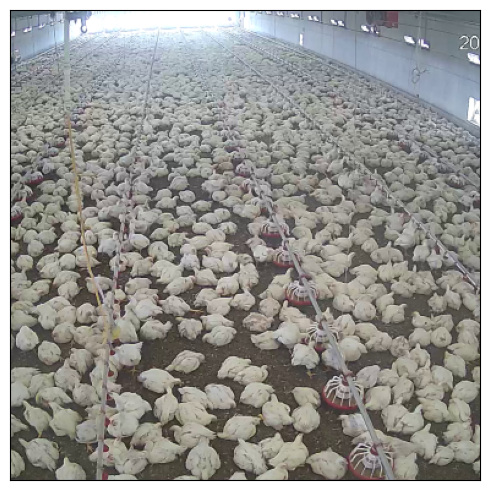

In [4]:
import cv2
from render import show_images
from image_utils import center_crop, resize_shortest_edge

imgs = []

for file_path in ['67.png']:
    img = cv2.imread(file_path)[..., ::-1]
    img = resize_shortest_edge(img, 384, interpolation='auto')
    img = center_crop(img, (384, 384))
    imgs.append(img)

show_images(imgs, per_row=1, imsize=(5, 5));

In [5]:
import torch
from prepare_input import prepare

inps = [prepare(img, model.default_cfg['mean'], model.default_cfg['std'])
        for img in imgs]

with torch.no_grad():
    out = torch.softmax(model(inps[0]), -1)[0].numpy()

# synsets at https://github.com/rwightman/pytorch-image-models/blob/master/results/imagenet_synsets.txt
# jay is 17
print(out.argmax())

580


In [6]:
from torchvision.models.feature_extraction import get_graph_node_names
from pprint import pprint

train_nodes, eval_nodes = get_graph_node_names(model)

assert([t == e for t, e in zip(train_nodes, eval_nodes)])

pprint(train_nodes)

['x',
 'conv1',
 'bn1',
 'act1',
 'maxpool',
 'layer1.0.conv1',
 'layer1.0.bn1',
 'layer1.0.act1',
 'layer1.0.conv2',
 'layer1.0.bn2',
 'layer1.0.drop_block',
 'layer1.0.act2',
 'layer1.0.aa',
 'layer1.0.conv3',
 'layer1.0.bn3',
 'layer1.0.downsample.0',
 'layer1.0.downsample.1',
 'layer1.0.add',
 'layer1.0.act3',
 'layer1.1.conv1',
 'layer1.1.bn1',
 'layer1.1.act1',
 'layer1.1.conv2',
 'layer1.1.bn2',
 'layer1.1.drop_block',
 'layer1.1.act2',
 'layer1.1.aa',
 'layer1.1.conv3',
 'layer1.1.bn3',
 'layer1.1.add',
 'layer1.1.act3',
 'layer1.2.conv1',
 'layer1.2.bn1',
 'layer1.2.act1',
 'layer1.2.conv2',
 'layer1.2.bn2',
 'layer1.2.drop_block',
 'layer1.2.act2',
 'layer1.2.aa',
 'layer1.2.conv3',
 'layer1.2.bn3',
 'layer1.2.add',
 'layer1.2.act3',
 'layer2.0.conv1',
 'layer2.0.bn1',
 'layer2.0.act1',
 'layer2.0.conv2',
 'layer2.0.bn2',
 'layer2.0.drop_block',
 'layer2.0.act2',
 'layer2.0.aa',
 'layer2.0.conv3',
 'layer2.0.bn3',
 'layer2.0.downsample.0',
 'layer2.0.downsample.1',
 'layer2.0

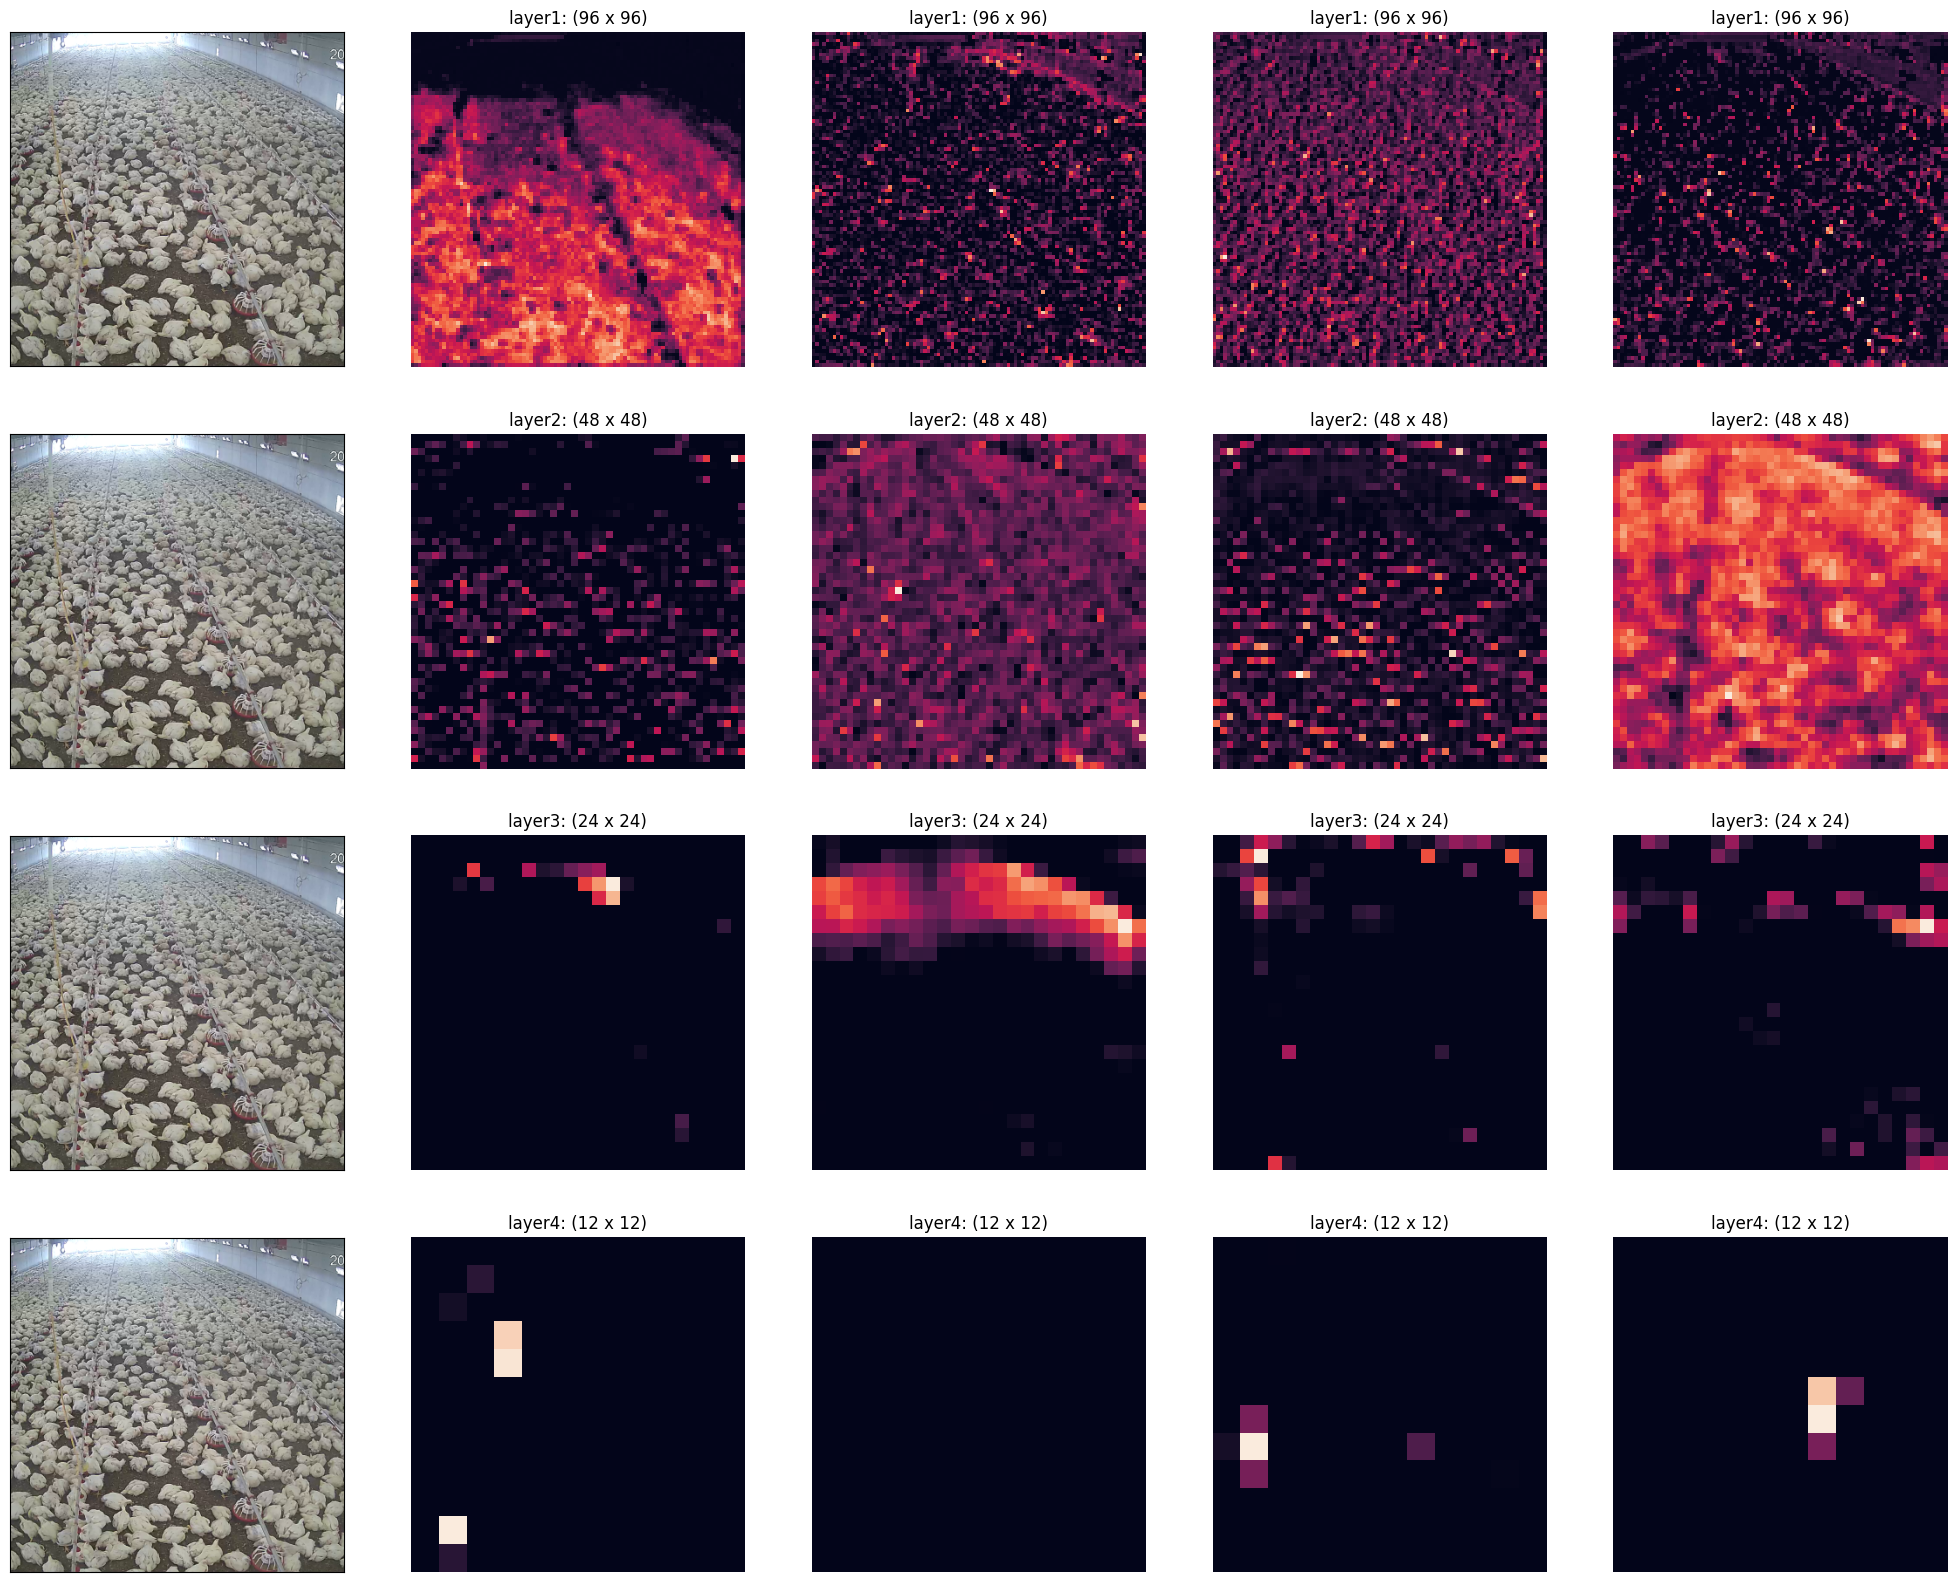

In [8]:
from torchvision.models.feature_extraction import create_feature_extractor
import random
import seaborn as sns
import matplotlib.pyplot as plt

return_nodes = ['layer1', 'layer2', 'layer3', 'layer4']

feat_ext = create_feature_extractor(model, return_nodes=return_nodes)

with torch.no_grad():
    out = feat_ext(inps[0])

fig, ax = plt.subplots(4, 5, figsize=(25, 20))

# Pick 4 random feature maps from each layer
for i, layer in enumerate(return_nodes):
    feat_maps = out[layer].numpy().squeeze(0)
    feat_maps = random.sample(list(feat_maps), 4)
    ax[i][0].imshow(imgs[0])
    ax[i][0].set_xticks([])
    ax[i][0].set_yticks([])
    for j, feat_map in enumerate(feat_maps):
        sns.heatmap(feat_map, ax=ax[i][j+1], cbar=False)
        ax[i][j+1].set_xticks([])
        ax[i][j+1].set_yticks([])
        ax[i][j+1].set_title(f'{layer}: ({feat_map.shape[0]} x {feat_map.shape[1]})')

In [43]:
model = timm.create_model('xcit_medium_24_p8_384_dist', pretrained=True)

model.eval()

inps = [prepare(img, model.default_cfg['mean'], model.default_cfg['std'])
        for img in imgs]

with torch.no_grad():
    out = torch.softmax(model(inps[0]), -1)[0].numpy()

# synsets at https://github.com/rwightman/pytorch-image-models/blob/master/results/imagenet_synsets.txt
# jay is 17
print(out.argmax())

17


In [46]:
from timm.models.xcit import PositionalEncodingFourier

train_nodes, eval_nodes = get_graph_node_names(
    model, tracer_kwargs={'leaf_modules': [PositionalEncodingFourier]})

assert([t == e for t, e in zip(train_nodes, eval_nodes)])

pprint(train_nodes)

['x',
 'getattr_1',
 'getitem',
 'patch_embed.proj.0.0',
 'patch_embed.proj.0.1',
 'patch_embed.proj.1',
 'patch_embed.proj.2.0',
 'patch_embed.proj.2.1',
 'patch_embed.proj.3',
 'patch_embed.proj.4.0',
 'patch_embed.proj.4.1',
 'patch_embed.getattr_2',
 'patch_embed.getitem_1',
 'patch_embed.getattr_3',
 'patch_embed.getitem_2',
 'patch_embed.flatten',
 'patch_embed.transpose',
 'pos_embed',
 'getattr_4',
 'getitem_3',
 'reshape',
 'permute',
 'add',
 'pos_drop',
 'blocks.0.blocks_0_gamma1',
 'blocks.0.norm1',
 'blocks.0.attn.getattr_5',
 'blocks.0.attn.getitem_4',
 'blocks.0.attn.getitem_5',
 'blocks.0.attn.getitem_6',
 'blocks.0.attn.qkv',
 'blocks.0.attn.floordiv',
 'blocks.0.attn.reshape_1',
 'blocks.0.attn.permute_1',
 'blocks.0.attn.getitem_7',
 'blocks.0.attn.getitem_8',
 'blocks.0.attn.getitem_9',
 'blocks.0.attn.normalize',
 'blocks.0.attn.normalize_1',
 'blocks.0.attn.transpose_1',
 'blocks.0.attn.matmul',
 'blocks.0.attn.blocks_0_attn_temperature',
 'blocks.0.attn.mul',
 'b

In [49]:
from skimage.transform import resize
import math
import torch.nn.functional as F

return_nodes = {
    'cls_attn_blocks.0.attn.matmul_48': 'attn'
}

feat_ext = create_feature_extractor(
    model, return_nodes=return_nodes,
    tracer_kwargs={'leaf_modules': [PositionalEncodingFourier]})

ix = 0

with torch.no_grad():
    out = feat_ext(inps[ix])#['attn']
    # Softmax with temperature
    heat_maps = torch.softmax(out/5, -1)
    # Remove class token
    heat_maps = heat_maps[..., 1:]
    # Deflatten
    edge_length = int(math.sqrt(heat_maps.shape[-1]))
    heat_maps = heat_maps.reshape(1, -1, edge_length, edge_length)
    # Resize to image shape
    heat_maps = F.interpolate(heat_maps, imgs[ix].shape[:2], mode='bicubic')
    heat_maps = list(heat_maps[0].squeeze(1).numpy())

import numpy as np
import matplotlib.cm as cm

def overlay_heat_map(
        img: np.ndarray, heat_map: np.ndarray, color=(255, 0, 0)) -> np.ndarray:
    """
    heat_map values should be in [0, 1]
    """
    assert (heat_map.shape[0] == img.shape[0]) and (heat_map.shape[1] == img.shape[1])
    # overlay = np.tile(color, (*img.shape[:2], 1))
    overlay = cm.hot(heat_map)[..., :3] * 255
    heat_map = heat_map[..., None].repeat(3, -1)
    img = (img * (1 - heat_map) + overlay * heat_map).astype(np.uint8)
    return img
    # return overlay.astype(np.uint8)


# Scale pixels
heat_maps = [(hm - hm.min()) / (hm.max() - hm.min()) for hm in heat_maps]
heat_map_imgs = [overlay_heat_map(imgs[ix], heat_map) for heat_map in heat_maps]
heat_map_imgs.insert(4, imgs[ix])
heat_map_imgs.insert(0, imgs[ix])
show_images(heat_map_imgs, per_row=5, imsize=(5, 5));

torch.Size([1, 8, 1, 2305])


48